In [352]:
import pyforest
import sys
sys.path.append('/Users/jayceepang/msse/ATOM_CODE/UTILS/')
from matplotlib.lines import Line2D

In [353]:
og_neks = ['NEK2_binding','NEK2_inhibition','NEK3_binding','NEK5_binding','NEK9_binding','NEK9_inhibition']
samplings =['none_scaled','UNDER','SMOTE','ADASYN'] 
new_neks=['NEK1', 'NEK11', 'NEK2', 'NEK3', 'NEK4', 'NEK5',
       'NEK6', 'NEK9']

og_datapath = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/featurized/'
results_dir='/Users/jayceepang/msse/ATOM_CODE/examples/holdout/holdout_results/'
gp_results_dir='/Users/jayceepang/msse/ATOM_CODE/examples/holdout/holdout_results/GP/'
datapath = '/Users/jayceepang/msse/ATOM_CODE/datasets/holdout_data/featurized/'
gp_path ='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/GP_results/'

feat_cols_dropped =['NEK','compound_id','base_rdkit_smiles', 'subset', 'active'] 

In [354]:
rf_results=pd.read_csv(f'{results_dir}RF/RF_nanobret_cellular_holdout_results.csv')
gp_results = pd.read_csv(f'{results_dir}GP/GP_nanobret_cellular_holdout_results.csv')
gp_results['RF_type'] = 'GP_matern'
rf_results_cols = set(rf_results.columns)
gp_results_cols = set(gp_results.columns)

print(len(rf_results_cols), len(gp_results_cols))
print(rf_results_cols==gp_results_cols)
print(rf_results_cols-gp_results_cols)


<IPython.core.display.Javascript object>

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jayceepang/msse/ATOM_CODE/examples/holdout/holdout_results/RF/RF_nanobret_cellular_holdout_results.csv'

In [194]:
all_results= pd.concat([rf_results, gp_results])
# all_results.to_csv('holdout/holdout_results/all_nanobret_cellular_holdout_results.csv',index=False)
og_neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding','NEK9_binding', 'NEK9_inhibition'] 
best_rfs = [f'{og_nek}_MFP_none_scaled_BRFC' for og_nek in og_neks]
best_rfs.append('NEK9_inhibition_MFP_none_scaled_BRFC_BCW')
best_gps = [f'{og_nek}_UNDER_GP_matern' for og_nek in og_neks]
selected_prods = best_rfs+best_gps
selected_prods.remove('NEK9_inhibition_MFP_none_scaled_BRFC')
selected_prods

<IPython.core.display.Javascript object>

['NEK2_binding_MFP_none_scaled_BRFC',
 'NEK2_inhibition_MFP_none_scaled_BRFC',
 'NEK3_binding_MFP_none_scaled_BRFC',
 'NEK5_binding_MFP_none_scaled_BRFC',
 'NEK9_binding_MFP_none_scaled_BRFC',
 'NEK9_inhibition_MFP_none_scaled_BRFC_BCW',
 'NEK2_binding_UNDER_GP_matern',
 'NEK2_inhibition_UNDER_GP_matern',
 'NEK3_binding_UNDER_GP_matern',
 'NEK5_binding_UNDER_GP_matern',
 'NEK9_binding_UNDER_GP_matern',
 'NEK9_inhibition_UNDER_GP_matern']

In [248]:
selected_results = all_results[all_results['prod_model'].isin(selected_prods)]
print(selected_results['modeling_type'].unique())

['RF' 'GP']


In [337]:

selected_results['model'] = selected_results['model'].str.replace('none_scaled', 'Orig', regex=False)
selected_results['prod_model']=selected_results['prod_model'].str.replace('none_scaled', 'Orig')
selected_results['model strategy']=selected_results['model strategy'].str.replace('none_scaled', 'Orig')
# selected_results['model strategy'] =selected_results['model strategy'].replace({'NEK9_inhibition_MFP_Orig_BRFC_BCW',
#                                         'NEK9_inhibition_Orig Bstrp Under RF BalWeight',
#                                         'NEK2_binding_MFP_Orig_BRFC', 'NEK2_binding_Orig Bstrp Under RF'
#                                             'NEK3_binding_MFP_Orig_BRFC', 'NEK3_binding_Orig Bstrp Under RF',
#                                         'NEK5_binding_MFP_Orig_BRFC', 'NEK5_binding_Orig Bstrp Under RF',
#                                         'NEK9_binding_MFP_Orig_BRFC', 'NEK_binding_Orig Bstrp Under RF',
#                                         'NEK2_inhibition_MFP_Orig_BRFC', 'NEK3_inhibition_Orig Bstrp Under RF'
#                                             })

selected_results['prod_model'] = selected_results['prod_model'].replace({
    'NEK9_inhibition_MFP_Orig_BRFC_BCW': 'NEK9_inhibition_Orig Bstrp Under RF BalWeight',
    # 'NEK9_inhibition_Orig Bstrp Under RF BalWeight': 'NEK9 inhibition Orig Bootstrap Under RF BalWeight',
    'NEK2_binding_MFP_Orig_BRFC': 'NEK2_binding_Orig Bstrp Under RF',
    'NEK3_binding_MFP_Orig_BRFC': 'NEK3_binding_Orig Bstrp Under RF',
    # 'NEK3_binding_Orig Bstrp Under RF': 'NEK3_binding Orig Bootstrap Under RF',
    'NEK3_binding_Orig Bootstrap Under RF':'NEK3_binding_Orig Bstrp Under RF' ,
    'NEK5_binding_MFP_Orig_BRFC': 'NEK5_binding_Orig Bstrp Under RF',
    'NEK_binding_Orig Bstrp Under RF': 'NEK9_binding_Orig Bstrp Under RF',
    'NEK2_inhibition_MFP_Orig_BRFC': 'NEK2_inhibition_Orig Bstrp Under RF'})
selected_results['model strategy_old'] = selected_results['model strategy']

# selected_results['model strategy'] =selected_results['prod_model'].str.split('_').str[2:].str.join('_')
selected_results

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/3533388305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_results['model'] = selected_results['model'].str.replace('none_scaled', 'Orig', regex=False)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/3533388305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_results['prod_model']=selected_results['prod_model'].str.replace('none_scaled', 'Orig')
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykerne

,model,prod_model,data NEK,NEK,model NEK,strategy,feat_type,RF_type,cm,recall,...,precision,f1,ROC_AUC,MCC,balanced_accuracy,1-specificity,model strategy,modeling_type,set,model strategy_old
2,NEK1_NEK2_binding_MFP_Orig_BRFC,NEK2_binding_Orig Bstrp Under RF,NEK1,NEK1,NEK2_binding,none_scaled,MFP,BRFC,"[134, 236, 5, 25]",0.833333,...,0.095785,0.171821,0.597748,0.108136,0.597748,0.637838,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
18,NEK1_NEK2_inhibition_MFP_Orig_BRFC,NEK2_inhibition_Orig Bstrp Under RF,NEK1,NEK1,NEK2_inhibition,none_scaled,MFP,BRFC,"[136, 234, 2, 28]",0.933333,...,0.106870,0.191781,0.650450,0.166723,0.650450,0.632432,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
34,NEK1_NEK3_binding_MFP_Orig_BRFC,NEK3_binding_Orig Bstrp Under RF,NEK1,NEK1,NEK3_binding,none_scaled,MFP,BRFC,"[178, 192, 2, 28]",0.933333,...,0.127273,0.224000,0.707207,0.219406,0.707207,0.518919,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
50,NEK1_NEK5_binding_MFP_Orig_BRFC,NEK5_binding_Orig Bstrp Under RF,NEK1,NEK1,NEK5_binding,none_scaled,MFP,BRFC,"[185, 185, 6, 24]",0.800000,...,0.114833,0.200837,0.650000,0.158195,0.650000,0.500000,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
66,NEK1_NEK9_binding_MFP_Orig_BRFC,NEK9_binding_Orig Bstrp Under RF,NEK1,NEK1,NEK9_binding,none_scaled,MFP,BRFC,"[154, 216, 0, 30]",1.000000,...,0.121951,0.217391,0.708108,0.225296,0.708108,0.583784,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,NEK9_NEK2_inhibition_MFP_UNDER_GP_matern,NEK2_inhibition_UNDER_GP_matern,NEK9,NEK9,NEK2_inhibition,UNDER,MFP,GP_matern,"[137, 229, 4, 30]",0.882353,...,0.115830,0.204778,0.628335,0.149829,0.628335,0.625683,UNDER_GP_matern,GP,nanobret_cellular_holdout,UNDER_GP_matern
177,NEK9_NEK3_binding_MFP_UNDER_GP_matern,NEK3_binding_UNDER_GP_matern,NEK9,NEK9,NEK3_binding,UNDER,MFP,GP_matern,"[187, 179, 4, 30]",0.882353,...,0.143541,0.246914,0.696641,0.219581,0.696641,0.489071,UNDER_GP_matern,GP,nanobret_cellular_holdout,UNDER_GP_matern
181,NEK9_NEK5_binding_MFP_UNDER_GP_matern,NEK5_binding_UNDER_GP_matern,NEK9,NEK9,NEK5_binding,UNDER,MFP,GP_matern,"[174, 192, 0, 34]",1.000000,...,0.150442,0.261538,0.737705,0.267436,0.737705,0.524590,UNDER_GP_matern,GP,nanobret_cellular_holdout,UNDER_GP_matern
185,NEK9_NEK9_binding_MFP_UNDER_GP_matern,NEK9_binding_UNDER_GP_matern,NEK9,NEK9,NEK9_binding,UNDER,MFP,GP_matern,"[150, 216, 0, 34]",1.000000,...,0.136000,0.239437,0.704918,0.236088,0.704918,0.590164,UNDER_GP_matern,GP,nanobret_cellular_holdout,UNDER_GP_matern


In [338]:
# produ results
orig_results = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/prod_best_GP_best_RF.csv')
orig_results['model'] = orig_results['model'].replace('MFP_UNDER_matern', 'UNDER_GP_matern')

orig_results['model'] = orig_results['NEK'].astype(str)+'_'+orig_results['strategy'] 
orig_results=orig_results.rename(columns={'model': 'prod_model', 'NEK': 'data NEK'
                                         ,'model version':'model strategy_old'})

holdout_df_cols = ['model', 'data NEK', 'prod_model', 'model NEK', 'model version',
       'model strategy', 'feat_type', 'cm', 'recall', 'specificity',
       'accuracy', 'precision', 'f1', 'ROC_AUC', 'MCC', 'balanced_accuracy',
       'set', 'modeling_type', 'model strategy_old', '1-specificity']

orig_cols =['prod_model', 'data NEK', 'strategy', 'feat_type', 'cm', 'recall',
       'specificity', 'accuracy', 'precision', 'f1', 'ROC_AUC', 'MCC',
       'balanced_accuracy', 'modeling_type', 'set', '1-specificity',
       'nek type', 'model version', 'RF_type', 'model name', 'active ratio',
       'model', 'model NEK'] 
orig_results['model NEK'] = orig_results['data NEK'] 
extra_cols_to_drop = ['active ratio', 'RF_type', 'model name', 'nek type']
orig_results = orig_results.drop(columns=extra_cols_to_drop)
rf_prod_results = orig_results[(orig_results['strategy']=='Orig Bstrp Under RF')|
                            (orig_results['strategy']=='Orig Bstrp Under RF BalWeight')]


gp_prod_results = orig_results[orig_results['strategy']=='UNDER_GP_matern']
rf_prod_results


<IPython.core.display.Javascript object>

,prod_model,data NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,ROC_AUC,MCC,balanced_accuracy,modeling_type,set,1-specificity,model strategy_old,model NEK
1,NEK2_binding_Orig Bstrp Under RF,NEK2_binding,Orig Bstrp Under RF,MFP,"[225, 46, 4, 8]",0.666667,0.830258,0.823322,0.148148,0.242424,0.748462,0.254831,0.748462,RF,prod,0.169742,BRFC,NEK2_binding
3,NEK2_inhibition_Orig Bstrp Under RF,NEK2_inhibition,Orig Bstrp Under RF,MFP,"[344, 35, 6, 22]",0.785714,0.907652,0.899263,0.385965,0.517647,0.846683,0.505696,0.846683,RF,prod,0.092348,BRFC,NEK2_inhibition
5,NEK3_binding_Orig Bstrp Under RF,NEK3_binding,Orig Bstrp Under RF,MFP,"[193, 72, 5, 12]",0.705882,0.728302,0.726950,0.142857,0.237624,0.717092,0.225969,0.717092,RF,prod,0.271698,BRFC,NEK3_binding
7,NEK5_binding_Orig Bstrp Under RF,NEK5_binding,Orig Bstrp Under RF,MFP,"[194, 34, 10, 10]",0.500000,0.850877,0.822581,0.227273,0.312500,0.675439,0.250090,0.675439,RF,prod,0.149123,BRFC,NEK5_binding
9,NEK9_binding_Orig Bstrp Under RF,NEK9_binding,Orig Bstrp Under RF,MFP,"[229, 41, 4, 9]",0.692308,0.848148,0.840989,0.180000,0.285714,0.770228,0.296654,0.770228,RF,prod,0.151852,BRFC,NEK9_binding
11,NEK9_inhibition_Orig Bstrp Under RF BalWeight,NEK9_inhibition,Orig Bstrp Under RF BalWeight,MFP,"[63, 8, 1, 8]",0.888889,0.887324,0.887500,0.500000,0.640000,0.888106,0.613171,0.888106,RF,prod,0.112676,BRFC_BCW,NEK9_inhibition


In [339]:
nek9borig =rf_prod_results[rf_prod_results['model NEK'] == 'NEK9_binding']
nek9borig

,prod_model,data NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,ROC_AUC,MCC,balanced_accuracy,modeling_type,set,1-specificity,model strategy_old,model NEK
9,NEK9_binding_Orig Bstrp Under RF,NEK9_binding,Orig Bstrp Under RF,MFP,"[229, 41, 4, 9]",0.692308,0.848148,0.840989,0.18,0.285714,0.770228,0.296654,0.770228,RF,prod,0.151852,BRFC,NEK9_binding


In [340]:
nek9b = selected_results[selected_results['model NEK'] == 'NEK9_binding']
# nek9b2 = nek9b[nek9b['prod_model']=='NEK9_binding_Orig Bstrp Under RF']
# nek9b2
nek9b

,model,prod_model,data NEK,NEK,model NEK,strategy,feat_type,RF_type,cm,recall,...,precision,f1,ROC_AUC,MCC,balanced_accuracy,1-specificity,model strategy,modeling_type,set,model strategy_old
66,NEK1_NEK9_binding_MFP_Orig_BRFC,NEK9_binding_Orig Bstrp Under RF,NEK1,NEK1,NEK9_binding,none_scaled,MFP,BRFC,"[154, 216, 0, 30]",1.000000,...,0.121951,0.217391,0.708108,0.225296,0.708108,0.583784,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
162,NEK11_NEK9_binding_MFP_Orig_BRFC,NEK9_binding_Orig Bstrp Under RF,NEK11,NEK11,NEK9_binding,none_scaled,MFP,BRFC,"[156, 242, 1, 1]",0.500000,...,0.004115,0.008163,0.445980,-0.015606,0.445980,0.608040,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
258,NEK2_NEK9_binding_MFP_Orig_BRFC,NEK9_binding_Orig Bstrp Under RF,NEK2,NEK2,NEK9_binding,none_scaled,MFP,BRFC,"[146, 223, 2, 29]",0.935484,...,0.115079,0.204947,0.665574,0.183394,0.665574,0.604336,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
354,NEK3_NEK9_binding_MFP_Orig_BRFC,NEK9_binding_Orig Bstrp Under RF,NEK3,NEK3,NEK9_binding,none_scaled,MFP,BRFC,"[154, 218, 0, 28]",1.000000,...,0.113821,0.204380,0.706989,0.217070,0.706989,0.586022,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
450,NEK4_NEK9_binding_MFP_Orig_BRFC,NEK9_binding_Orig Bstrp Under RF,NEK4,NEK4,NEK9_binding,none_scaled,MFP,BRFC,"[152, 248, 0, 0]",0.000000,...,0.000000,0.000000,NaN,0.000000,0.380000,0.620000,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
546,NEK5_NEK9_binding_MFP_Orig_BRFC,NEK9_binding_Orig Bstrp Under RF,NEK5,NEK5,NEK9_binding,none_scaled,MFP,BRFC,"[156, 164, 3, 77]",0.962500,...,0.319502,0.479751,0.725000,0.367812,0.725000,0.512500,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
642,NEK6_NEK9_binding_MFP_Orig_BRFC,NEK9_binding_Orig Bstrp Under RF,NEK6,NEK6,NEK9_binding,none_scaled,MFP,BRFC,"[160, 240, 0, 0]",0.000000,...,0.000000,0.000000,NaN,0.000000,0.400000,0.600000,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
738,NEK9_NEK9_binding_MFP_Orig_BRFC,NEK9_binding_Orig Bstrp Under RF,NEK9,NEK9,NEK9_binding,none_scaled,MFP,BRFC,"[153, 213, 0, 34]",1.000000,...,0.137652,0.241993,0.709016,0.239881,0.709016,0.581967,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
17,NEK1_NEK9_binding_MFP_UNDER_GP_matern,NEK9_binding_UNDER_GP_matern,NEK1,NEK1,NEK9_binding,UNDER,MFP,GP_matern,"[150, 220, 0, 30]",1.000000,...,0.120000,0.214286,0.702703,0.220564,0.702703,0.594595,UNDER_GP_matern,GP,nanobret_cellular_holdout,UNDER_GP_matern
41,NEK11_NEK9_binding_MFP_UNDER_GP_matern,NEK9_binding_UNDER_GP_matern,NEK11,NEK11,NEK9_binding,UNDER,MFP,GP_matern,"[149, 249, 1, 1]",0.500000,...,0.004000,0.007937,0.437186,-0.018303,0.437186,0.625628,UNDER_GP_matern,GP,nanobret_cellular_holdout,UNDER_GP_matern


NEK2_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/1894820957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/1894820957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/1894820957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/1894820957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/1894820957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

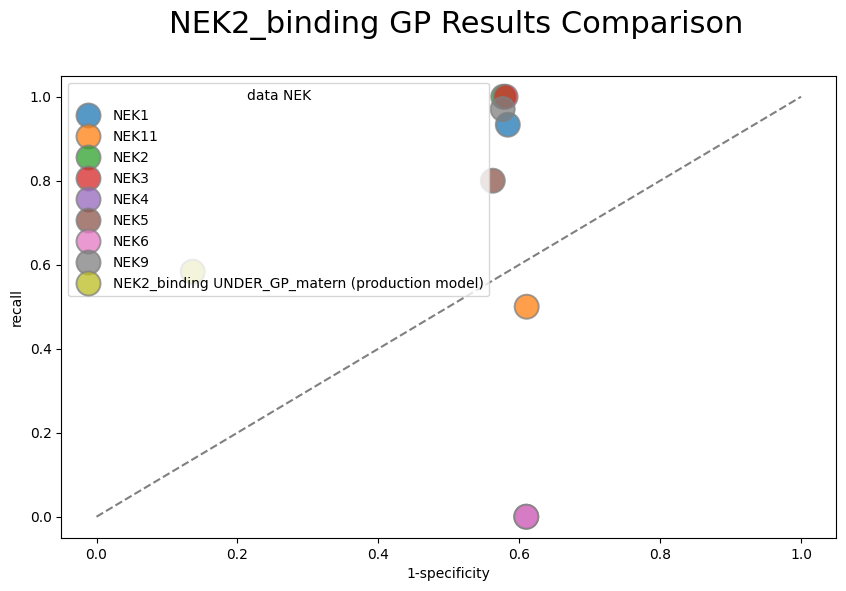

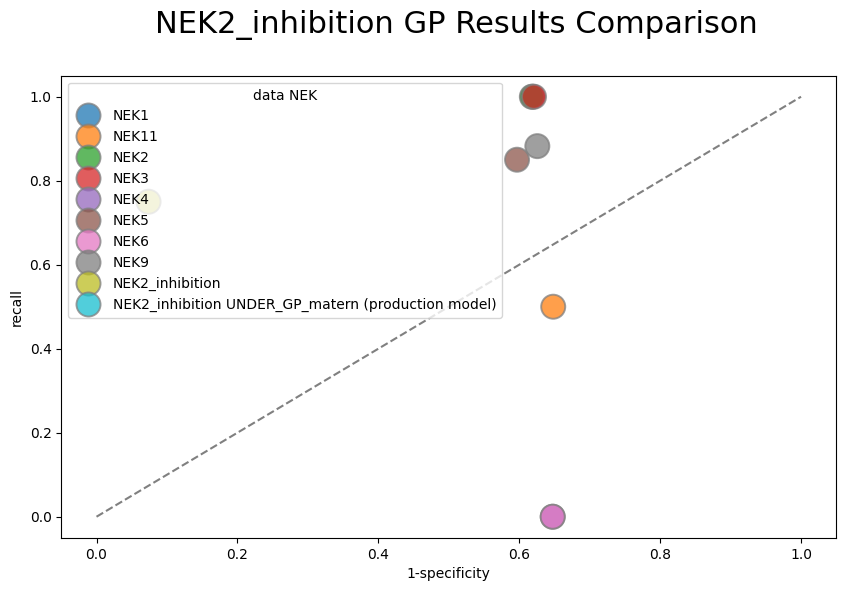

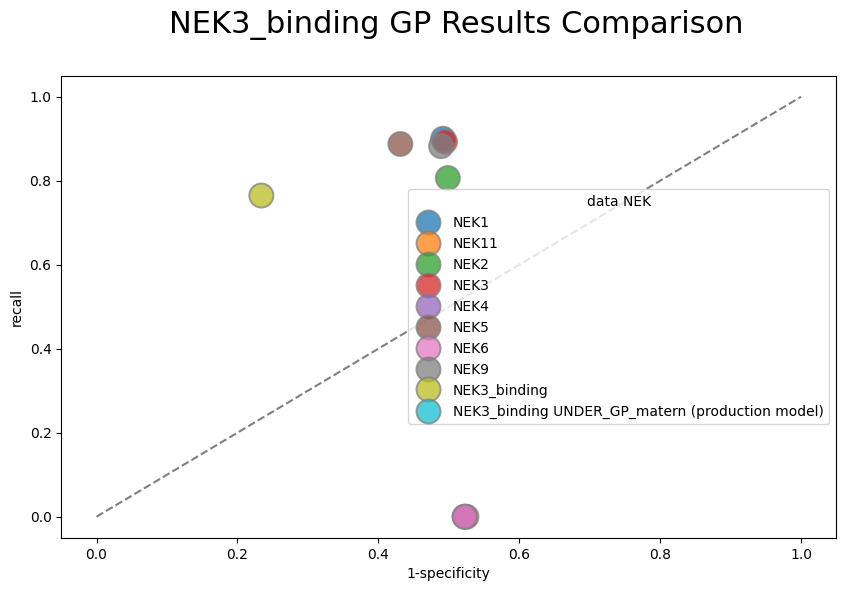

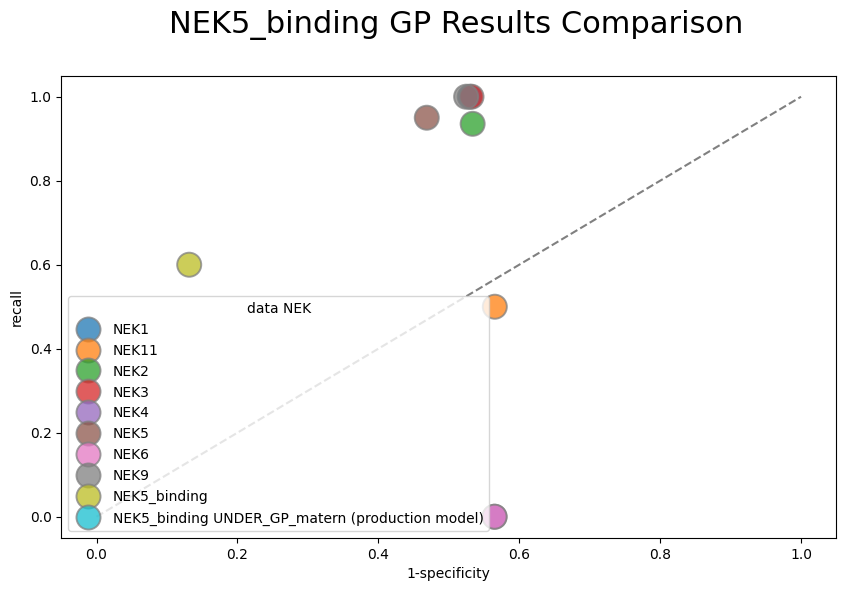

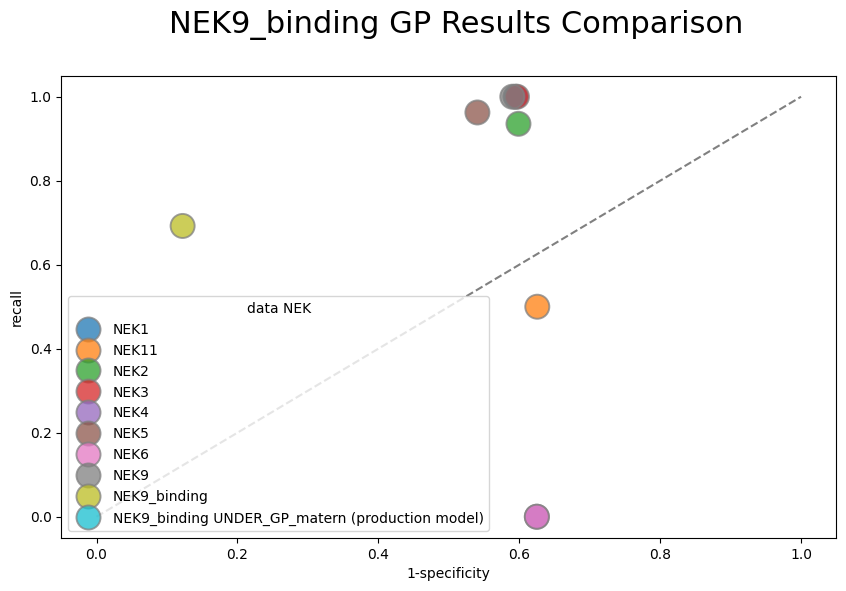

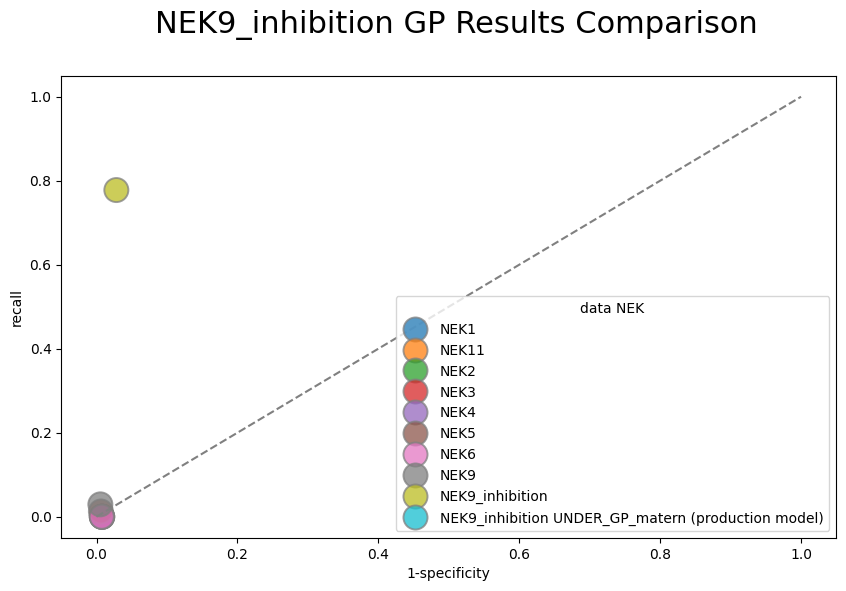

In [351]:

for nek in gp_prod_results['model NEK'].unique():
    print(nek)
    fig, axs = plt.subplots(figsize=(10,6))
    plt.suptitle(f'{nek} GP Results Comparison',fontsize=22, x=0.52, y=0.99)
    
    strategy = gp_prod_results['strategy'].values[0]
    prod_result= gp_prod_results[gp_prod_results['model NEK']==nek] 
    prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'
    
    new_results = selected_results[(selected_results['model strategy']==strategy) 
                & (selected_results['model NEK']==nek)]
    plotting_df = pd.concat([new_results, prod_result], ignore_index=True)

    

    sns.scatterplot(data=plotting_df, x='1-specificity', y='recall', hue='data NEK'
                   ,edgecolor='gray',alpha=0.75,s=300 )
    plt.plot([-0,1], [0, 1], linestyle='--', color='gray')
    plt.savefig(f'comparison_figs/{nek}_{strategy}.png',bbox_inches='tight')

In [347]:
selected_results['prod_model'].value_counts() # 6 rf, 6 gp, 8 for each = 96 results

prod_model
NEK2_binding_Orig Bstrp Under RF                 8
NEK2_inhibition_Orig Bstrp Under RF              8
NEK3_binding_Orig Bstrp Under RF                 8
NEK5_binding_Orig Bstrp Under RF                 8
NEK9_binding_Orig Bstrp Under RF                 8
NEK9_inhibition_Orig Bstrp Under RF BalWeight    8
NEK2_binding_UNDER_GP_matern                     8
NEK2_inhibition_UNDER_GP_matern                  8
NEK3_binding_UNDER_GP_matern                     8
NEK5_binding_UNDER_GP_matern                     8
NEK9_binding_UNDER_GP_matern                     8
NEK9_inhibition_UNDER_GP_matern                  8
Name: count, dtype: int64

In [348]:
nek3 = selected_results[selected_results['model NEK']=='NEK3_binding']
nek3
nek3_prod =rf_prod_results[rf_prod_results['model NEK']=='NEK3_binding'] # NEK3_binding_Orig Bstrp Under RF
nek3_prod # NEK3_binding_Orig Bstrp Under RF 
nek3 # NEK3_binding_Orig Bootstrap Under RF

,model,prod_model,data NEK,NEK,model NEK,strategy,feat_type,RF_type,cm,recall,...,precision,f1,ROC_AUC,MCC,balanced_accuracy,1-specificity,model strategy,modeling_type,set,model strategy_old
34,NEK1_NEK3_binding_MFP_Orig_BRFC,NEK3_binding_Orig Bstrp Under RF,NEK1,NEK1,NEK3_binding,none_scaled,MFP,BRFC,"[178, 192, 2, 28]",0.933333,...,0.127273,0.224000,0.707207,0.219406,0.707207,0.518919,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
130,NEK11_NEK3_binding_MFP_Orig_BRFC,NEK3_binding_Orig Bstrp Under RF,NEK11,NEK11,NEK3_binding,none_scaled,MFP,BRFC,"[168, 230, 1, 1]",0.500000,...,0.004329,0.008584,0.461055,-0.011122,0.461055,0.577889,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
226,NEK2_NEK3_binding_MFP_Orig_BRFC,NEK3_binding_Orig Bstrp Under RF,NEK2,NEK2,NEK3_binding,none_scaled,MFP,BRFC,"[174, 195, 3, 28]",0.903226,...,0.125561,0.220472,0.687385,0.201753,0.687385,0.528455,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
322,NEK3_NEK3_binding_MFP_Orig_BRFC,NEK3_binding_Orig Bstrp Under RF,NEK3,NEK3,NEK3_binding,none_scaled,MFP,BRFC,"[178, 194, 0, 28]",1.000000,...,0.126126,0.224000,0.739247,0.245664,0.739247,0.521505,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
418,NEK4_NEK3_binding_MFP_Orig_BRFC,NEK3_binding_Orig Bstrp Under RF,NEK4,NEK4,NEK3_binding,none_scaled,MFP,BRFC,"[173, 227, 0, 0]",0.000000,...,0.000000,0.000000,NaN,0.000000,0.432500,0.567500,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
514,NEK5_NEK3_binding_MFP_Orig_BRFC,NEK3_binding_Orig Bstrp Under RF,NEK5,NEK5,NEK3_binding,none_scaled,MFP,BRFC,"[184, 136, 7, 73]",0.912500,...,0.349282,0.505190,0.743750,0.390395,0.743750,0.425000,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
610,NEK6_NEK3_binding_MFP_Orig_BRFC,NEK3_binding_Orig Bstrp Under RF,NEK6,NEK6,NEK3_binding,none_scaled,MFP,BRFC,"[178, 222, 0, 0]",0.000000,...,0.000000,0.000000,NaN,0.000000,0.445000,0.555000,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
706,NEK9_NEK3_binding_MFP_Orig_BRFC,NEK3_binding_Orig Bstrp Under RF,NEK9,NEK9,NEK3_binding,none_scaled,MFP,BRFC,"[167, 199, 1, 33]",0.970588,...,0.142241,0.248120,0.713436,0.241201,0.713436,0.543716,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
9,NEK1_NEK3_binding_MFP_UNDER_GP_matern,NEK3_binding_UNDER_GP_matern,NEK1,NEK1,NEK3_binding,UNDER,MFP,GP_matern,"[188, 182, 3, 27]",0.900000,...,0.129187,0.225941,0.704054,0.215202,0.704054,0.491892,UNDER_GP_matern,GP,nanobret_cellular_holdout,UNDER_GP_matern
33,NEK11_NEK3_binding_MFP_UNDER_GP_matern,NEK3_binding_UNDER_GP_matern,NEK11,NEK11,NEK3_binding,UNDER,MFP,GP_matern,"[189, 209, 2, 0]",0.000000,...,0.000000,0.000000,0.237437,-0.074153,0.237437,0.525126,UNDER_GP_matern,GP,nanobret_cellular_holdout,UNDER_GP_matern


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding_Orig Bstrp Under RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition_Orig Bstrp Under RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding_Orig Bstrp Under RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding_Orig Bstrp Under RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding_Orig Bstrp Under RF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition_Orig Bstrp Under RF BalWeight


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

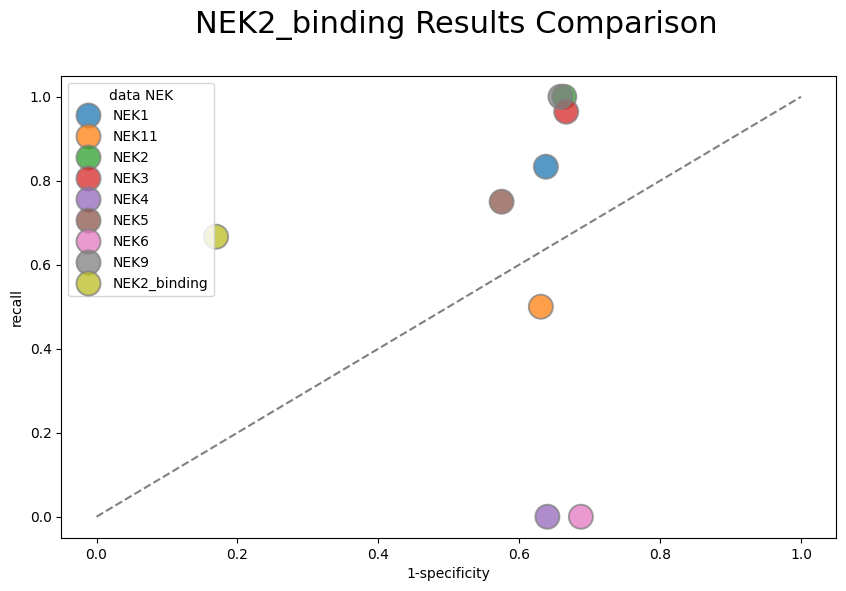

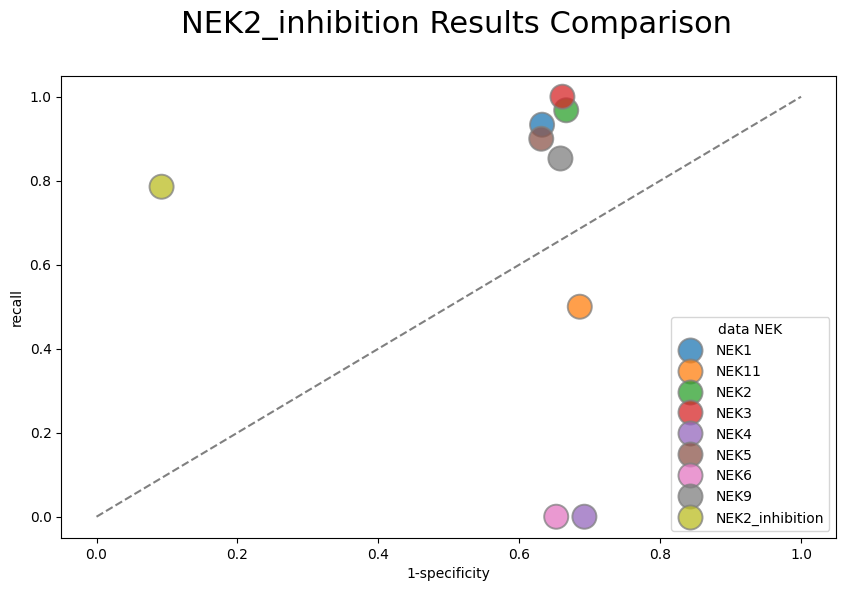

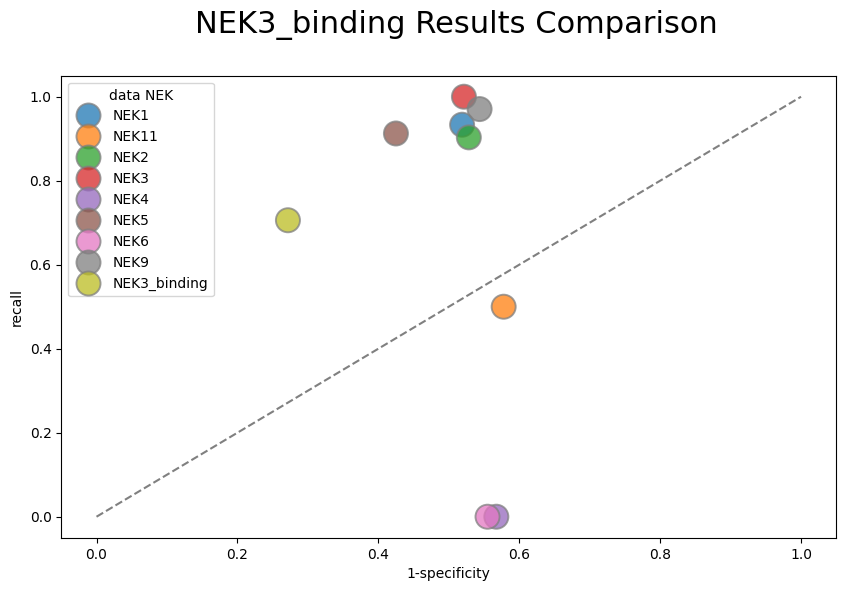

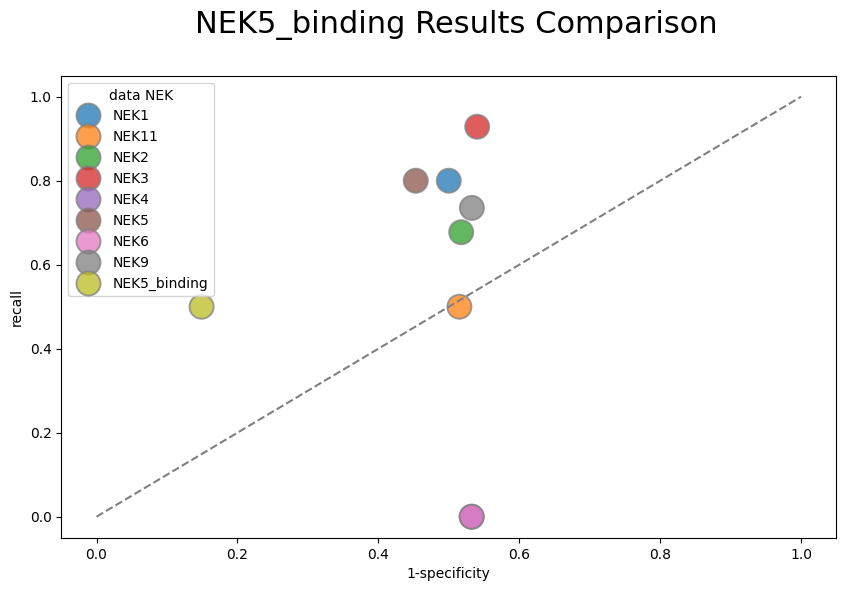

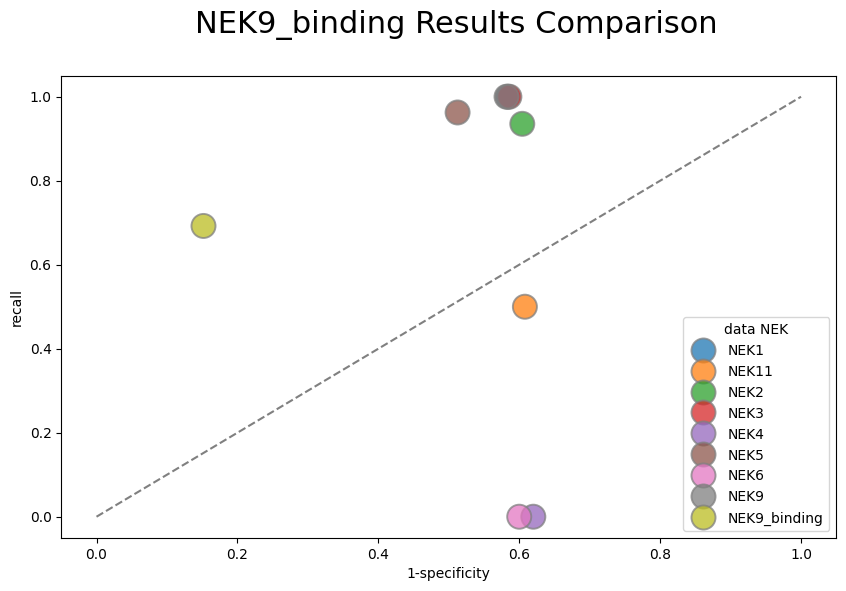

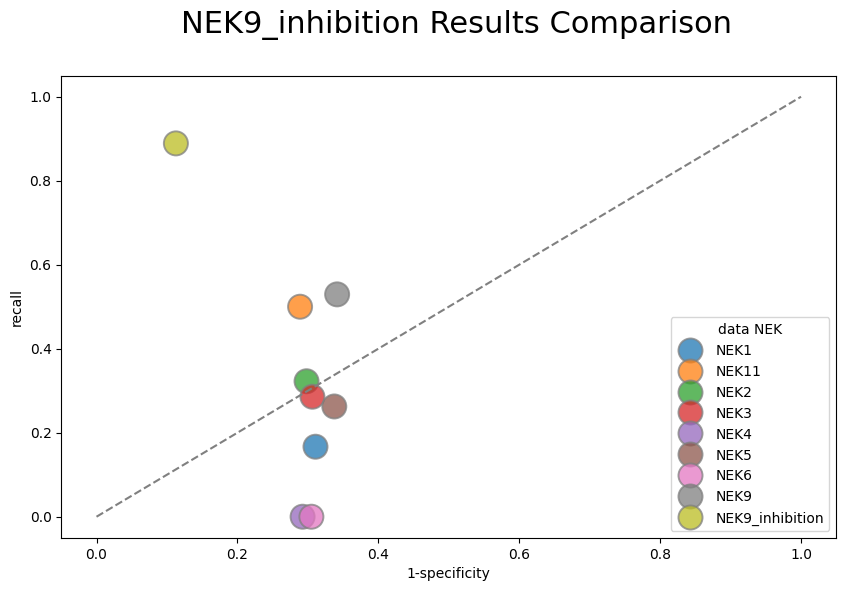

In [350]:
simple_cols =['prod_model', 'data NEK', 'strategy', 'recall', '1-specificity'] 
for nek in rf_prod_results['model NEK'].unique():
    # print(nek)
    fig, axs = plt.subplots(figsize=(10,6))
    plt.suptitle(f'{nek} Results Comparison',fontsize=22, x=0.52, y=0.99)
    prod_result= rf_prod_results[rf_prod_results['model NEK']==nek][simple_cols]

    prod_model_name = prod_result['prod_model'].values[0]
    print(prod_model_name)
    # new_results = selected_results[(selected_results['model strategy']==strategy) 
    #             & (selected_results['model NEK']==nek)]
    new_results = selected_results[selected_results['prod_model']== prod_model_name][simple_cols]
    plotting_df = pd.concat([new_results, prod_result], ignore_index=True)

    sns.scatterplot(data=plotting_df, x='1-specificity', y='recall', hue='data NEK'
                   ,edgecolor='gray',alpha=0.75,s=300 )
    plt.plot([-0,1], [0, 1], linestyle='--', color='gray')
    plt.savefig(f'comparison_figs/{prod_model_name}.png',bbox_inches='tight')

In [365]:
# pth2 = '/Users/jayceepang/msse/ATOM_CODE/examples/holdout/holdout_results/drive-download-20251111T211832Z-1-001/'
# gp2 = pd.read_csv(f'{pth2}GP_nanobret_cellular_holdout_results.csv')
# rf2 = pd.read_csv(f'{pth2}RF_nanobret_cellular_holdout_results.csv')
# merged2 = pd.concat([gp2,rf2])
# merged2 = merged2[(merged2['data NEK']==merged2['NEK']) & (merged2['model NEK'].isin(og_neks))
#     & (merged2['data NEK'].isin(['NEK2','NEK3', 'NEK5', 'NEK9']))
#     &(merged2['strategy'].isin(['none_scaled', 'UNDER']))]
# merged2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,model,prod_model,NEK,data NEK,model NEK,strategy,feat_type,cm,recall,specificity,...,precision,f1,ROC_AUC,MCC,balanced_accuracy,1-specificity,model strategy,modeling_type,set,RF_type
48,NEK2_NEK2_binding_MFP_none_scaled_GP_matern,NEK2_binding_none_scaled_GP_matern,NEK2,NEK2,NEK2_binding,none_scaled,MFP,"[369, 0, 31, 0]",0.000000,1.000000,...,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,none_scaled_GP_matern,GP,nanobret_cellular_holdout,NaN
49,NEK2_NEK2_binding_MFP_UNDER_GP_matern,NEK2_binding_UNDER_GP_matern,NEK2,NEK2,NEK2_binding,UNDER,MFP,"[156, 213, 0, 31]",1.000000,0.422764,...,0.127049,0.225455,0.711382,0.231758,0.711382,0.577236,UNDER_GP_matern,GP,nanobret_cellular_holdout,NaN
52,NEK2_NEK2_inhibition_MFP_none_scaled_GP_matern,NEK2_inhibition_none_scaled_GP_matern,NEK2,NEK2,NEK2_inhibition,none_scaled,MFP,"[369, 0, 31, 0]",0.000000,1.000000,...,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,none_scaled_GP_matern,GP,nanobret_cellular_holdout,NaN
53,NEK2_NEK2_inhibition_MFP_UNDER_GP_matern,NEK2_inhibition_UNDER_GP_matern,NEK2,NEK2,NEK2_inhibition,UNDER,MFP,"[141, 228, 0, 31]",1.000000,0.382114,...,0.119691,0.213793,0.691057,0.213859,0.691057,0.617886,UNDER_GP_matern,GP,nanobret_cellular_holdout,NaN
56,NEK2_NEK3_binding_MFP_none_scaled_GP_matern,NEK3_binding_none_scaled_GP_matern,NEK2,NEK2,NEK3_binding,none_scaled,MFP,"[369, 0, 31, 0]",0.000000,1.000000,...,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,none_scaled_GP_matern,GP,nanobret_cellular_holdout,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,NEK9_NEK9_inhibition_MFP_none_scaled_BRFC_BCW,NEK9_inhibition_MFP_none_scaled_BRFC_BCW,NEK9,NEK9,NEK9_inhibition,none_scaled,MFP,"[241, 125, 16, 18]",0.529412,0.658470,...,0.125874,0.203390,0.593941,0.109328,0.593941,0.341530,none_scaled_BRFC_BCW,RF,nanobret_cellular_holdout,BRFC_BCW
756,NEK9_NEK9_inhibition_MFP_UNDER_RF,NEK9_inhibition_MFP_UNDER_RF,NEK9,NEK9,NEK9_inhibition,UNDER,MFP,"[185, 181, 5, 29]",0.852941,0.505464,...,0.138095,0.237705,0.679203,0.200156,0.679203,0.494536,UNDER_RF,RF,nanobret_cellular_holdout,RF
757,NEK9_NEK9_inhibition_MFP_UNDER_RF_BCW,NEK9_inhibition_MFP_UNDER_RF_BCW,NEK9,NEK9,NEK9_inhibition,UNDER,MFP,"[185, 181, 6, 28]",0.823529,0.505464,...,0.133971,0.230453,0.664497,0.183687,0.664497,0.494536,UNDER_RF_BCW,RF,nanobret_cellular_holdout,RF_BCW
758,NEK9_NEK9_inhibition_MFP_UNDER_BRFC,NEK9_inhibition_MFP_UNDER_BRFC,NEK9,NEK9,NEK9_inhibition,UNDER,MFP,"[184, 182, 6, 28]",0.823529,0.502732,...,0.133333,0.229508,0.663131,0.182205,0.663131,0.497268,UNDER_BRFC,RF,nanobret_cellular_holdout,BRFC


In [376]:
pth3 = '/Users/jayceepang/msse/ATOM_CODE/examples/holdout/holdout_results/'
df = pd.read_csv(f'{pth3}ALL_SETS_holdout1&2_GP&RF_results.csv')
df = df[df['strategy']!='ADASYN']
df['model strategy'].unique()

<IPython.core.display.Javascript object>

array(['none_scaled_BRFC', 'none_scaled_BRFC_BCW', 'none_scaled_RF',
       'none_scaled_RF_BCW', 'SMOTE_BRFC', 'SMOTE_BRFC_BCW', 'SMOTE_RF',
       'SMOTE_RF_BCW', 'UNDER_BRFC', 'UNDER_BRFC_BCW', 'UNDER_RF',
       'UNDER_RF_BCW', 'none_scaled_GP_matern', 'SMOTE_GP_matern',
       'UNDER_GP_matern'], dtype=object)

In [397]:
df.columns

Index(['model', 'prod_model', 'NEK', 'data NEK', 'model NEK', 'strategy',
       'feat_type', 'cm', 'recall', 'specificity', 'accuracy', 'precision',
       'f1', 'ROC_AUC', 'MCC', 'balanced_accuracy', '1-specificity',
       'model strategy', 'modeling_type', 'set', 'RF_type', 'nek type',
       'model version'],
      dtype='object')

9
9
9
9
9
9
['none_scaled_BRFC' 'none_scaled_BRFC_BCW' 'none_scaled_GP_matern'
 'none_scaled_RF' 'none_scaled_RF_BCW' 'SMOTE_GP_matern' 'SMOTE_RF'
 'UNDER_GP_matern' 'UNDER_RF']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

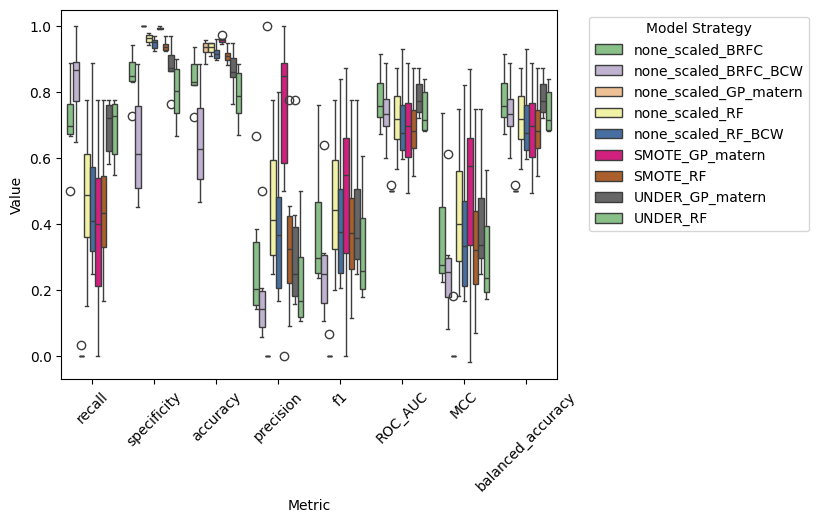

In [423]:
just_mfp = df[df['feat_type']=='MFP']
just_mfp_prod = just_mfp[just_mfp['set'] == 'prod']
for nek in just_mfp_prod['model NEK'].unique(): 
    nek_mfp =just_mfp_prod[just_mfp_prod['model NEK'] == nek]
    print(len(just_mfp_prod['model strategy'].unique()))
metrics = ['recall', 'specificity', 'accuracy', 'precision',
           'f1', 'ROC_AUC', 'MCC', 'balanced_accuracy']
prod_melted= just_mfp_prod.melt(id_vars=['model','NEK', 'model strategy'], value_vars=metrics,
                    var_name='Metric',
                    value_name='Value')
# Melt the DataFrame
# id_vars: Columns to keep as identifier variables (not melted)
# var_name: Name for the new column containing the original column headers
# value_name: Name for the new column containing the values from the melted columns
# prod_melted
# prod_melted2 = just_mfp_prod.melt(id_vars=['model NEK', 'model strategy'],value_vars=metrics,
#         var_name='Metric',
#         value_name='Value')
print(prod_melted['model strategy'].unique())
sns.boxplot(x =prod_melted['Metric'],y =prod_melted2['Value'],hue =prod_melted2['model strategy'],palette = 'Accent')
plt.xticks(rotation=45)
plt.legend(title='Model Strategy',bbox_to_anchor=(1.05,1),loc='upper left')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/1238915632.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/1238915632.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/1238915632.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


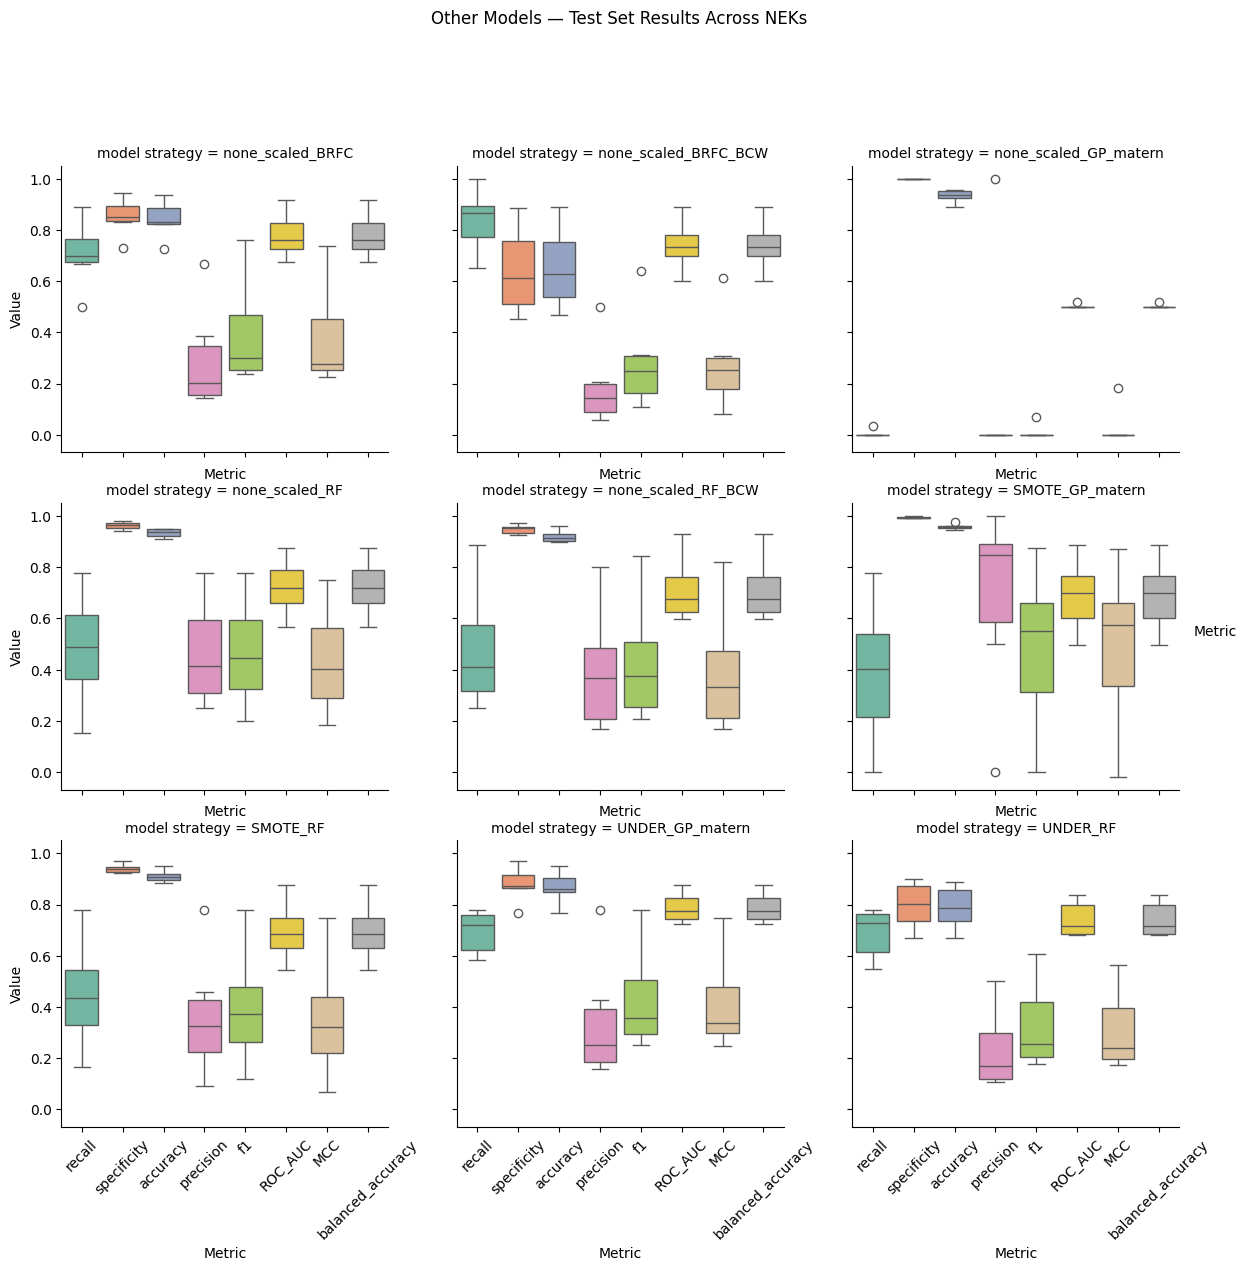

In [459]:
g = sns.FacetGrid(prod_melted, col='model strategy', col_wrap=3, sharey=True,sharex=False, height=4)
g.map_dataframe(sns.boxplot, x="Metric", y="Value", hue='Metric', palette="Set2")
axes = g.axes.flatten()
n_cols = 3
n_axes = len(axes)
last_row_indices = range(n_axes - n_cols, n_axes)

for i, ax in enumerate(axes):
    if i not in last_row_indices:
        # Hide x tick labels for all but the last row
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        # Rotate x tick labels for last row
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_xlabel("Metric")
    axes[i].set_xlabel("Metric")   # label only last row
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Other Models — Test Set Results Across NEKs")
g.add_legend(title="Metric")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

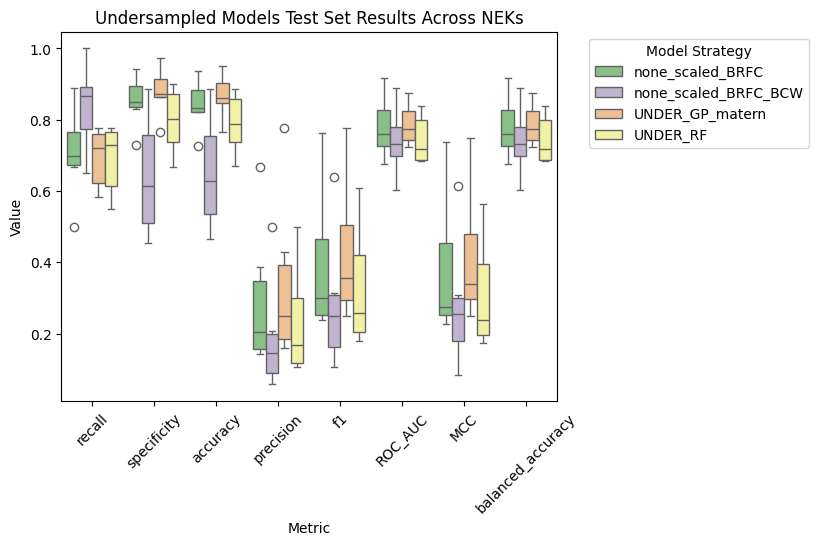

In [431]:
just_unders = just_mfp_prod[
    just_mfp_prod['model strategy'].isin([ 'none_scaled_BRFC', 
        'none_scaled_BRFC_BCW', 'UNDER_RF','UNDER_GP_matern'])]

prod_melted_unders= just_unders.melt(id_vars=['model','NEK', 'model strategy'], value_vars=metrics,
                    var_name='Metric',
                    value_name='Value')
sns.boxplot(x =prod_melted_unders['Metric'],y =prod_melted_unders['Value'],hue =prod_melted_unders['model strategy'],palette = 'Accent')
plt.xticks(rotation=45)
plt.title('Undersampled Models' Test Set Results Across NEKs')
plt.legend(title='Model Strategy',bbox_to_anchor=(1.05,1),loc='upper left')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

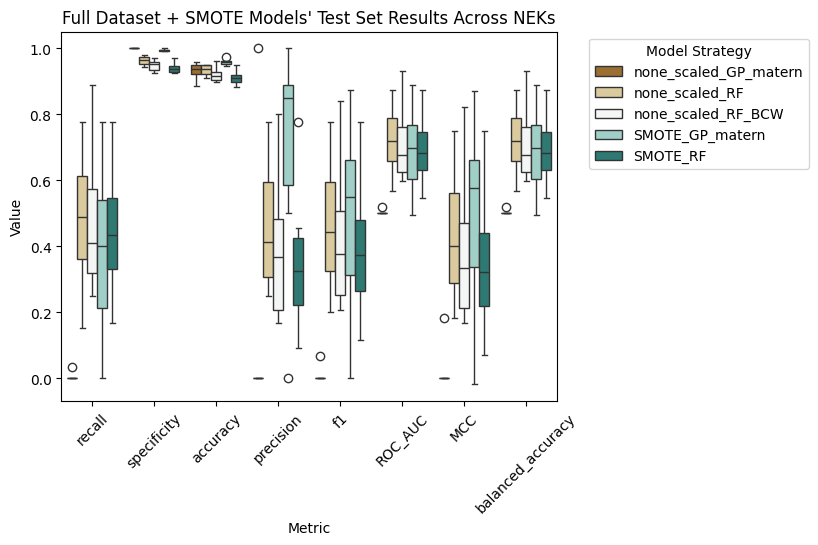

In [439]:
other_models = just_mfp_prod[
    just_mfp_prod['model strategy'].isin(['none_scaled_RF' ,'none_scaled_RF_BCW' , 'none_scaled_GP_matern',  
        'SMOTE_RF', 'SMOTE_GP_matern'])]

prod_melted_others= other_models.melt(id_vars=['model','NEK', 'model strategy'], value_vars=metrics,
                    var_name='Metric',
                    value_name='Value')
sns.boxplot(x =prod_melted_others['Metric'],y =prod_melted_others['Value'],hue =prod_melted_others['model strategy'],palette = 'BrBG')
plt.xticks(rotation=45)
plt.title("Full Dataset or SMOTE Models' Test Set Results Across NEKs")
plt.legend(title='Model Strategy',bbox_to_anchor=(1.05,1),loc='upper left')

In [438]:
gps = prod_melted_others[prod_melted_others['model strategy']=='none_scaled_GP_matern']
gps

,model,NEK,model strategy,Metric,Value
0,NEK2_binding_MFP_none_scaled_GP_matern,NEK2,none_scaled_GP_matern,recall,0.000000
5,NEK2_inhibition_MFP_none_scaled_GP_matern,NEK2,none_scaled_GP_matern,recall,0.035714
10,NEK3_binding_MFP_none_scaled_GP_matern,NEK3,none_scaled_GP_matern,recall,0.000000
15,NEK5_binding_MFP_none_scaled_GP_matern,NEK5,none_scaled_GP_matern,recall,0.000000
20,NEK9_binding_MFP_none_scaled_GP_matern,NEK9,none_scaled_GP_matern,recall,0.000000
25,NEK9_inhibition_MFP_none_scaled_GP_matern,NEK9,none_scaled_GP_matern,recall,0.000000
30,NEK2_binding_MFP_none_scaled_GP_matern,NEK2,none_scaled_GP_matern,specificity,1.000000
35,NEK2_inhibition_MFP_none_scaled_GP_matern,NEK2,none_scaled_GP_matern,specificity,1.000000
40,NEK3_binding_MFP_none_scaled_GP_matern,NEK3,none_scaled_GP_matern,specificity,1.000000
45,NEK5_binding_MFP_none_scaled_GP_matern,NEK5,none_scaled_GP_matern,specificity,1.000000


In [ ]:
['none_scaled_BRFC' 'none_scaled_BRFC_BCW' 'none_scaled_GP_matern'
 'none_scaled_RF' 'none_scaled_RF_BCW' 'SMOTE_GP_matern' 'SMOTE_RF'
 'UNDER_GP_matern' 'UNDER_RF']